# ANALISIS KOMPARATIF KINERJA ALGORITMA MULTI-LAYER PERCEPTRON (MLP) DAN CONVOLUTION NEURAL NETWORK (CNN) DENGAN EKSTRAKSI FITUR LANDMARK MEDIAPIPE UNTUK PENGENALAN BAHASA ISYARAT INDONESIA

# Import Library

In [1]:
# ===============================================
# 1. Import Library
# ===============================================
import os
import cv2
import numpy as np
import pandas as pd
import mediapipe as mp
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from tensorflow.keras import layers, models, Sequential
from sklearn.preprocessing import MinMaxScaler
import joblib
import tensorflow as tf
import random
import seaborn as sns

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

2025-12-04 20:28:00.332380: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load & Read Dataset

Kategori: A, Jumlah File: 220
Kategori: B, Jumlah File: 220
Kategori: C, Jumlah File: 220
Kategori: D, Jumlah File: 220
Kategori: E, Jumlah File: 220
Kategori: F, Jumlah File: 220
Kategori: G, Jumlah File: 220
Kategori: H, Jumlah File: 220
Kategori: I, Jumlah File: 220
Kategori: K, Jumlah File: 220
Kategori: L, Jumlah File: 220
Kategori: M, Jumlah File: 220
Kategori: N, Jumlah File: 220
Kategori: O, Jumlah File: 220
Kategori: P, Jumlah File: 220
Kategori: Q, Jumlah File: 220
Kategori: R, Jumlah File: 220
Kategori: S, Jumlah File: 220
Kategori: T, Jumlah File: 220
Kategori: U, Jumlah File: 220
Kategori: V, Jumlah File: 220
Kategori: W, Jumlah File: 220
Kategori: X, Jumlah File: 220
Kategori: Y, Jumlah File: 220
Total Gambar: 5280

Kategori: A - 5 Gambar Acak:


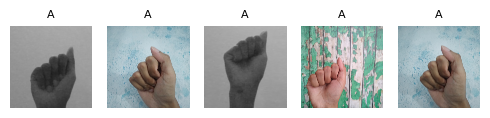


Kategori: B - 5 Gambar Acak:


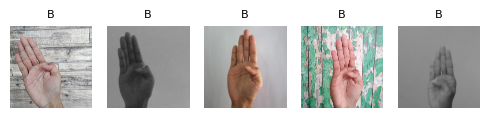


Kategori: C - 5 Gambar Acak:


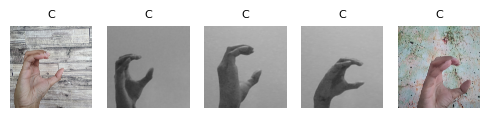


Kategori: D - 5 Gambar Acak:


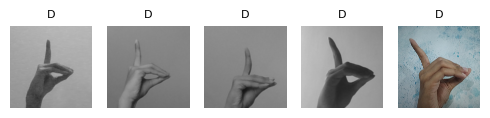


Kategori: E - 5 Gambar Acak:


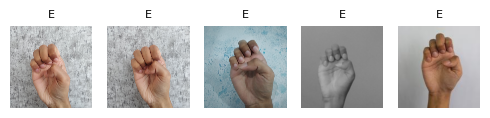


Kategori: F - 5 Gambar Acak:


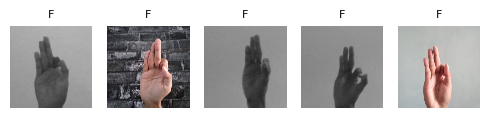


Kategori: G - 5 Gambar Acak:


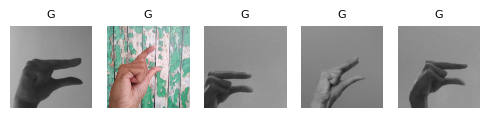


Kategori: H - 5 Gambar Acak:


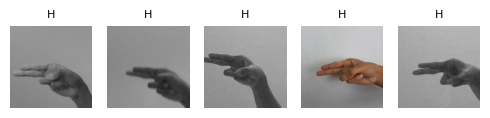


Kategori: I - 5 Gambar Acak:


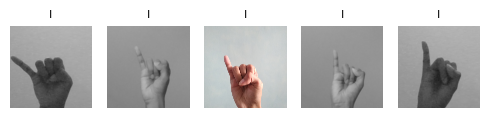


Kategori: K - 5 Gambar Acak:


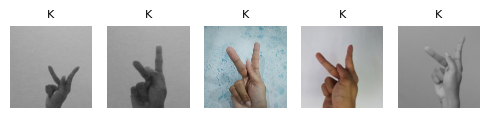


Kategori: L - 5 Gambar Acak:


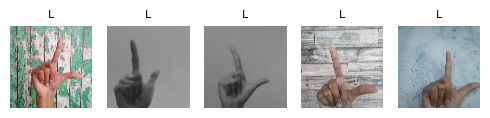


Kategori: M - 5 Gambar Acak:


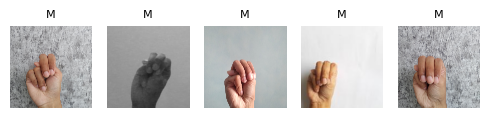


Kategori: N - 5 Gambar Acak:


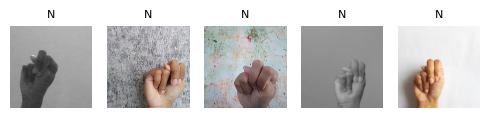


Kategori: O - 5 Gambar Acak:


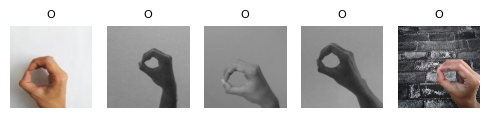


Kategori: P - 5 Gambar Acak:


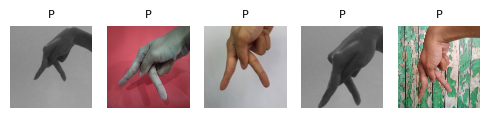


Kategori: Q - 5 Gambar Acak:


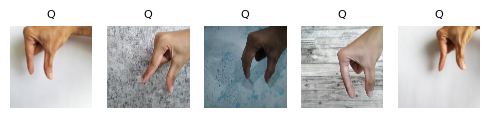


Kategori: R - 5 Gambar Acak:


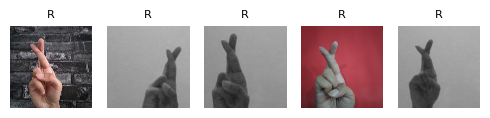


Kategori: S - 5 Gambar Acak:


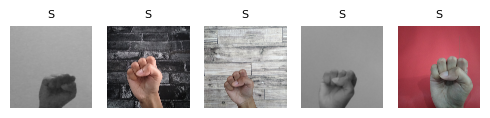


Kategori: T - 5 Gambar Acak:


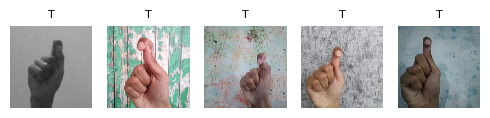


Kategori: U - 5 Gambar Acak:


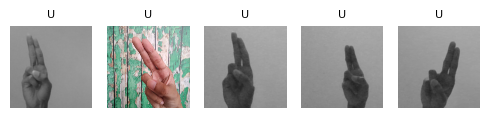


Kategori: V - 5 Gambar Acak:


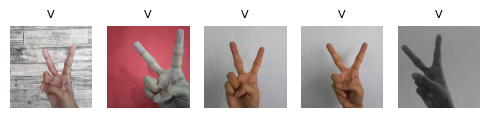


Kategori: W - 5 Gambar Acak:


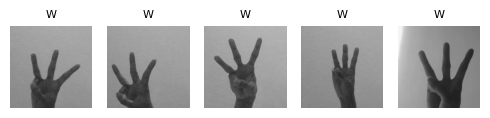


Kategori: X - 5 Gambar Acak:


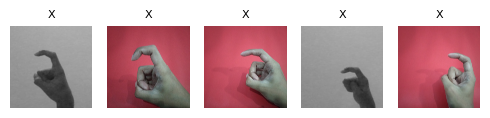


Kategori: Y - 5 Gambar Acak:


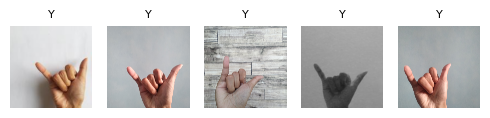

In [2]:
#------------------------------------------------
# 2. Load Dataset dan Visualisasi
#------------------------------------------------

# Path dataset
DATASET_PATH  = r"/media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/Dataset/SIBI"  # Gunakan raw string atau double-backslash di Windows

df = DATASET_PATH

data = {}

# Hitung jumlah gambar per kategori
for category in sorted(os.listdir(df)):
    category_path = os.path.join(df, category)
    if os.path.isdir(category_path):
        files = [f for f in os.listdir(category_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        data[category] = files

# Print jumlah gambar
for category, files in data.items():
    print(f"Kategori: {category}, Jumlah File: {len(files)}")

total_images = sum(len(files) for files in data.values())
print(f"Total Gambar: {total_images}")

# Tampilkan 5 gambar random per kategori
for category, files in data.items():
    print(f"\nKategori: {category} - 5 Gambar Acak:")
    plt.figure(figsize=(5, 3))  # ukuran plot disesuaikan
    selected_files = random.sample(files, min(5, len(files)))  # 5 random file
    for i, file in enumerate(selected_files):
        file_path = os.path.join(df, category, file)
        img = cv2.imread(file_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.title(f"{category}", fontsize=8)
            plt.axis('off')
    plt.tight_layout()
    plt.show()


# Ekstraksi Fitur Landmark Mediapipe

I0000 00:00:1764855032.935730    7409 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1764855032.952889   13549 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: Mesa Intel(R) HD Graphics 530 (SKL GT2)
Processing A:   0%|          | 0/220 [00:00<?, ?it/s]INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1764855033.809579   13533 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1764855033.896032   13537 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Processing Y: 100%|██████████| 220/220 [00:32<00:00,  6.70it/s]


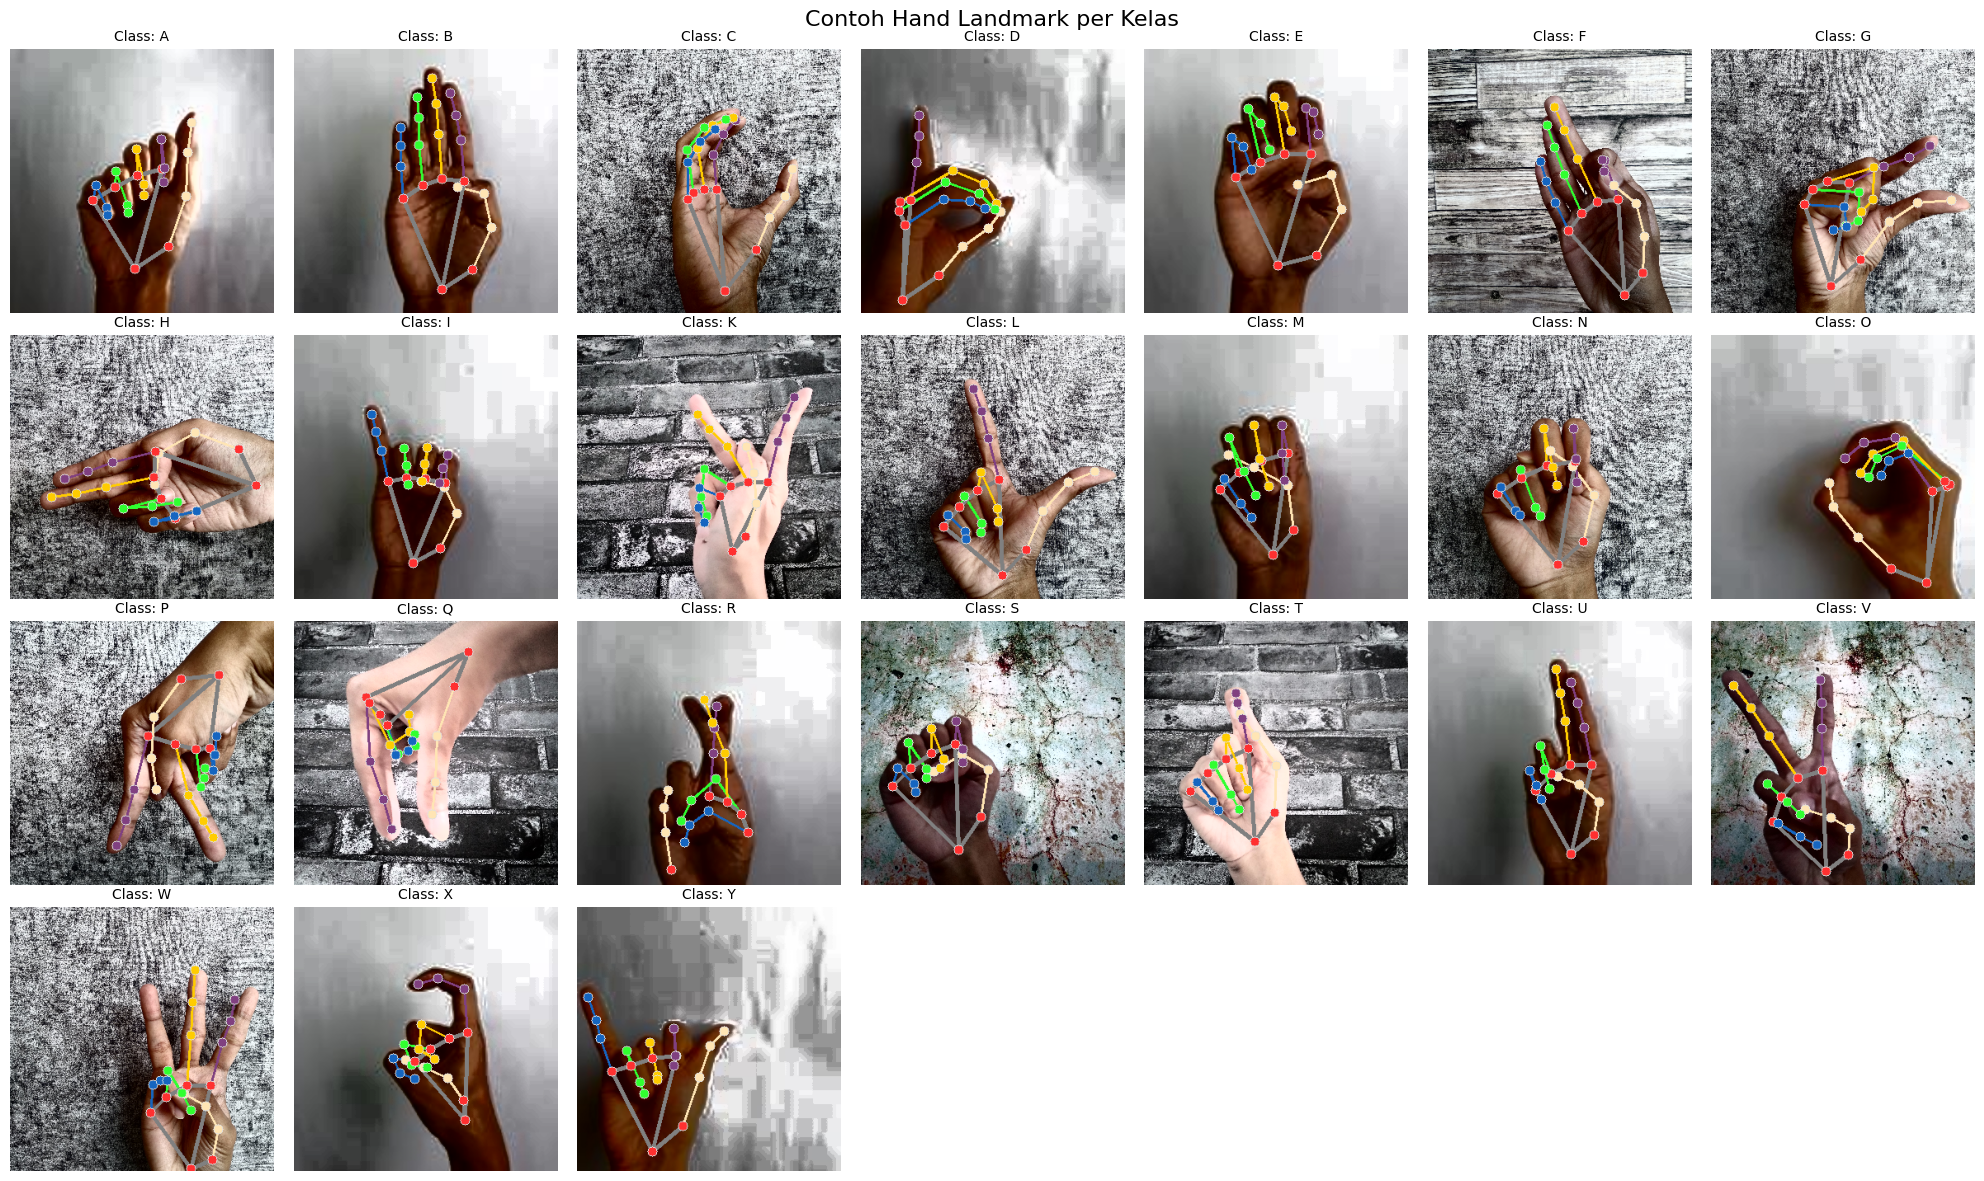


Total samples: 954
Classes found: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S'
 'T' 'U' 'V' 'W' 'X' 'Y']
Hand type distribution:
hand_type
Left     943
Right     11
Name: count, dtype: int64

Features saved to 'landmark_features.csv'

Sample data:
         x0        y0            z0 label hand_type
0  0.473133  0.831320 -8.343113e-07     A      Left
1  0.438390  0.841789 -9.815381e-07     A      Left
2  0.446594  0.846294 -1.092485e-06     A      Left
3  0.462956  0.869751 -1.091616e-06     A      Left
4  0.495633  0.858470 -5.999954e-07     A      Left

Proses selesai!


In [3]:
#------------------------------------------------
# 3. Ekstraksi Fitur Landmark Mediapipe
#------------------------------------------------

# Preprocessing function
def preprocess_image(img):
    """Preprocess image for better hand landmark detection""" 
    img = cv2.resize(img, (320, 320))
    # Optional: Histogram equalization for better contrast
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return img_eq

# MediaPipe setup dengan context manager
mp_hands = mp.solutions.hands   
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

features = []
visualization = {}

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,  # Maksimal 2 tangan
    model_complexity=1,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7
) as hands:
    
    for label in sorted(os.listdir(df)):
        folder = os.path.join(df, label)
        if not os.path.isdir(folder):
            continue
            
        # print(f"\nProcessing class: {label}")
        for img_file in tqdm(os.listdir(folder), desc=f"Processing {label}"):
            img_path = os.path.join(folder, img_file)
            
            # Load image
            img = cv2.imread(img_path)
            if img is None:
                continue
                
            # Convert BGR to RGB dan preprocessing
            rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            rgb = preprocess_image(rgb)
            
            # Process dengan MediaPipe
            results = hands.process(rgb)
            
            # Handle multiple hands
            if results.multi_hand_landmarks and results.multi_handedness:
                for hand_landmarks, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
                    score = handedness.classification[0].score
                    hand_label = handedness.classification[0].label  # Left or Right
                    
                    if score > 0.7:
                        # Extract landmark coordinates
                        row = [coord for lm in hand_landmarks.landmark for coord in (lm.x, lm.y, lm.z)]
                        row.append(label)  # Class label
                        row.append(hand_label)  # Hand label (Left/Right)
                        features.append(row)
                        
                        # Visualization untuk setiap kelas (simpan satu contoh)
                        if label not in visualization:
                            # Buat copy image untuk visualization
                            img_copy = rgb.copy()
                            img_copy = cv2.cvtColor(img_copy, cv2.COLOR_RGB2BGR)
                            
                            # Draw landmarks dengan style yang lebih baik
                            mp_drawing.draw_landmarks(
                                img_copy,
                                hand_landmarks,
                                mp_hands.HAND_CONNECTIONS,
                                mp_drawing_styles.get_default_hand_landmarks_style(),
                                mp_drawing_styles.get_default_hand_connections_style()
                            )
                            
                            # Convert back to RGB untuk matplotlib
                            img_copy_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
                            visualization[label] = img_copy_rgb
                        break  # Hanya ambil satu tangan untuk visualization

# Visualization
if visualization:
    num_classes = len(visualization)
    cols = 7  # Jumlah kolom dalam grid
    rows = (num_classes + cols - 1) // cols  # Calculate rows needed
    
    plt.figure(figsize=(20, 3 * rows))
    for i, (label, img) in enumerate(visualization.items()):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(f'Class: {label}', fontsize=10)
        plt.axis('off')
    
    plt.suptitle("Contoh Hand Landmark per Kelas", fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada data untuk divisualisasikan")

# Save features to CSV
if features:
    # Buat columns untuk landmarks + label + hand_type
    columns = [f"{axis}{i}" for i in range(21) for axis in ['x', 'y', 'z']] + ['label', 'hand_type']
    
    # Create DataFrame dan save
    df = pd.DataFrame(features, columns=columns)
    
    # Print statistics
    print(f"\nTotal samples: {len(features)}")
    print(f"Classes found: {df['label'].unique()}")
    print(f"Hand type distribution:")
    print(df['hand_type'].value_counts())
    
    # Save to CSV
    df.to_csv("landmark_features.csv", index=False)
    print(f"\nFeatures saved to 'landmark_features.csv'")
    
    # Print sample data
    print("\nSample data:")
    print(df[['x0', 'y0', 'z0', 'label', 'hand_type']].head())
else:
    print("Tidak ada features yang berhasil diekstraksi")

print("\nProses selesai!")

# Preprocessing Ekstraksi Fitur
- Normalisasi
- Augmentasi
- Balancing Data

I0000 00:00:1764855993.585657    7409 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1764855993.588080   18939 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: Mesa Intel(R) HD Graphics 530 (SKL GT2)


EKSTRAKSI FITUR LANMARK - VERSI IMPROVED
Found 24 classes

Processing class: A (220 images)


  A:   0%|          | 0/220 [00:00<?, ?it/s]W0000 00:00:1764855993.614968   18933 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1764855993.640758   18931 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  A: 100%|██████████| 220/220 [00:12<00:00, 17.59it/s]



Processing class: B (220 images)


  B: 100%|██████████| 220/220 [00:12<00:00, 17.11it/s]



Processing class: C (220 images)


  C: 100%|██████████| 220/220 [00:11<00:00, 19.13it/s]



Processing class: D (220 images)


  D: 100%|██████████| 220/220 [00:10<00:00, 20.52it/s]



Processing class: E (220 images)


  E: 100%|██████████| 220/220 [00:12<00:00, 18.00it/s]



Processing class: F (220 images)


  F: 100%|██████████| 220/220 [00:12<00:00, 17.93it/s]



Processing class: G (220 images)


  G: 100%|██████████| 220/220 [00:10<00:00, 20.29it/s]



Processing class: H (220 images)


  H: 100%|██████████| 220/220 [00:12<00:00, 17.72it/s]



Processing class: I (220 images)


  I: 100%|██████████| 220/220 [00:11<00:00, 18.73it/s]



Processing class: K (220 images)


  K: 100%|██████████| 220/220 [00:11<00:00, 18.70it/s]



Processing class: L (220 images)


  L: 100%|██████████| 220/220 [00:12<00:00, 18.05it/s]



Processing class: M (220 images)


  M: 100%|██████████| 220/220 [00:11<00:00, 18.76it/s]



Processing class: N (220 images)


  N: 100%|██████████| 220/220 [00:09<00:00, 22.66it/s]



Processing class: O (220 images)


  O: 100%|██████████| 220/220 [00:10<00:00, 20.82it/s]



Processing class: P (220 images)


  P: 100%|██████████| 220/220 [00:11<00:00, 19.75it/s]



Processing class: Q (220 images)


  Q: 100%|██████████| 220/220 [00:10<00:00, 20.52it/s]



Processing class: R (220 images)


  R: 100%|██████████| 220/220 [00:11<00:00, 19.77it/s]



Processing class: S (220 images)


  S: 100%|██████████| 220/220 [00:10<00:00, 20.18it/s]



Processing class: T (220 images)


  T: 100%|██████████| 220/220 [00:11<00:00, 19.96it/s]



Processing class: U (220 images)


  U: 100%|██████████| 220/220 [00:10<00:00, 21.33it/s]



Processing class: V (220 images)


  V: 100%|██████████| 220/220 [00:10<00:00, 21.20it/s]



Processing class: W (220 images)


  W: 100%|██████████| 220/220 [00:10<00:00, 21.21it/s]



Processing class: X (220 images)


  X: 100%|██████████| 220/220 [00:11<00:00, 19.78it/s]



Processing class: Y (220 images)


  Y: 100%|██████████| 220/220 [00:10<00:00, 20.16it/s]



EXTRACTION STATISTICS
Total images processed: 5280
Successful extractions: 1866 (35.3%)
Failed extractions: 3414 (64.7%)

Per class statistics:
  A: 131/220 (59.5%)
  B: 120/220 (54.5%)
  C: 55/220 (25.0%)
  D: 68/220 (30.9%)
  E: 111/220 (50.5%)
  F: 103/220 (46.8%)
  G: 62/220 (28.2%)
  H: 88/220 (40.0%)
  I: 92/220 (41.8%)
  K: 58/220 (26.4%)
  L: 85/220 (38.6%)
  M: 93/220 (42.3%)
  N: 77/220 (35.0%)
  O: 49/220 (22.3%)
  P: 31/220 (14.1%)
  Q: 35/220 (15.9%)
  R: 59/220 (26.8%)
  S: 72/220 (32.7%)
  T: 89/220 (40.5%)
  U: 70/220 (31.8%)
  V: 57/220 (25.9%)
  W: 74/220 (33.6%)
  X: 99/220 (45.0%)
  Y: 88/220 (40.0%)

Extracted features: 1866 samples
Classes distribution:
label
A    131
B    120
C     55
D     68
E    111
F    103
G     62
H     88
I     92
K     58
L     85
M     93
N     77
O     49
P     31
Q     35
R     59
S     72
T     89
U     70
V     57
W     74
X     99
Y     88
Name: count, dtype: int64

Class imbalance analysis:
  Min samples per class: 31
  Max sample

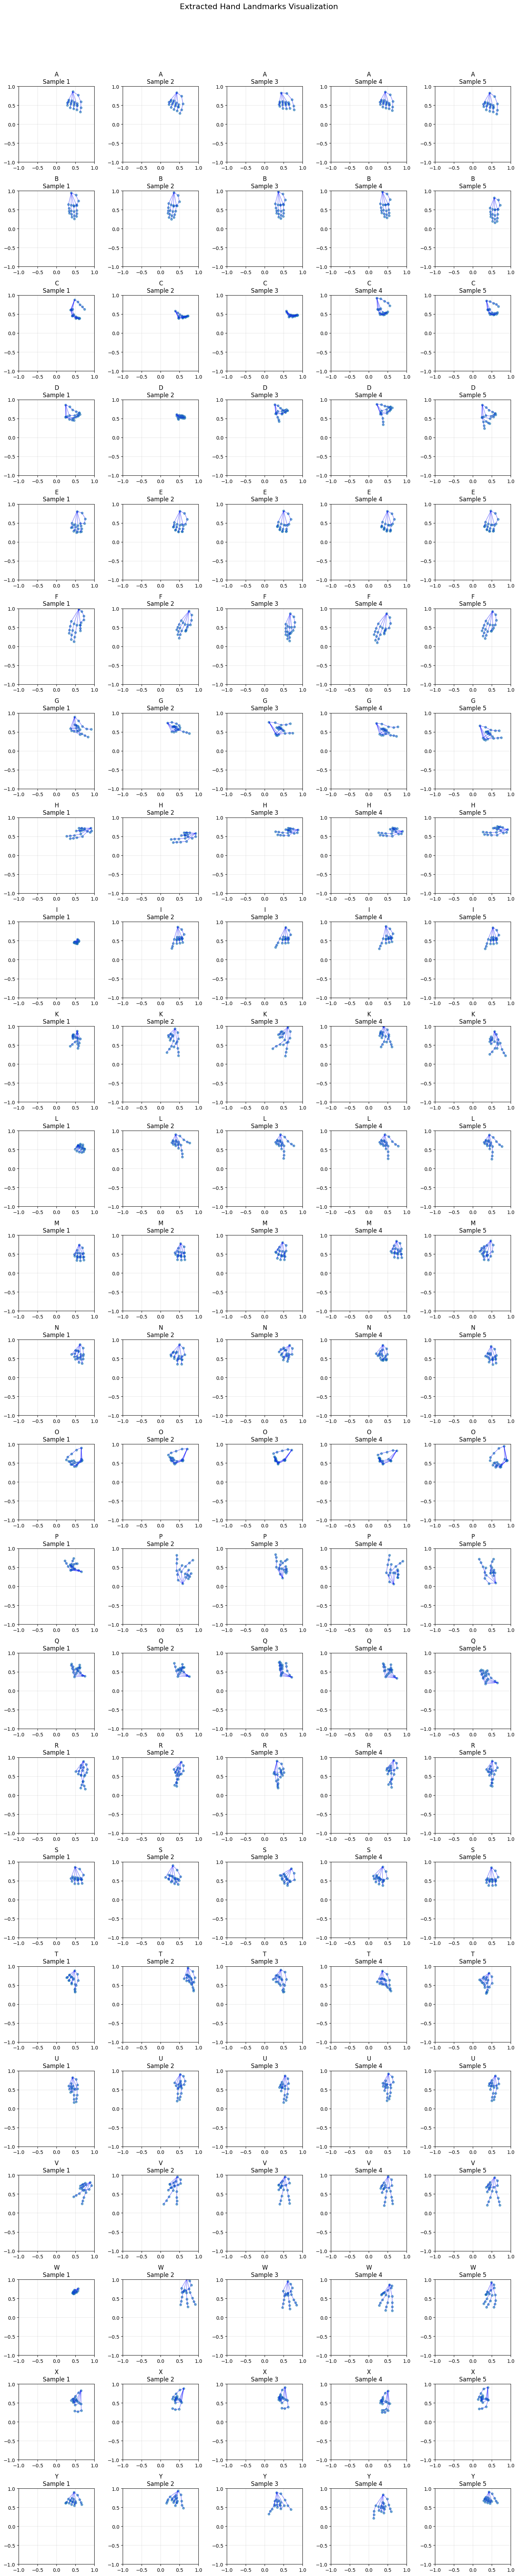


Failed to process 3414 images:
  /media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/Dataset/SIBI/A/1645707869.4431655.jpg
  /media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/Dataset/SIBI/A/1645707871.4600735.jpg
  /media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/Dataset/SIBI/A/1645707873.4433305.jpg
  /media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/Dataset/SIBI/A/1645707875.362499.jpg
  /media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/Dataset/SIBI/A/1645707878.1629865.jpg
  /media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/Dataset/SIBI/A/1645707880.020812.jpg
  /media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/Dataset/SIBI/A/1645707881.8436434.jpg
  /media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/Dataset/SIBI/A/1645707885.107614.jpg
  /media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/Dataset/SIBI/A/1645707888.3719525.jpg
  /media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/Dataset/SIBI/A/1645707891.3938608.jpg
  ... and 3404 more


In [4]:
# ===============================================
# EKSTRAKSI FITUR YANG LEBIH BAIK DAN KONSISTEN
# ===============================================

import os
import cv2
import numpy as np
import pandas as pd
import mediapipe as mp
from tqdm import tqdm
import matplotlib.pyplot as plt

def preprocess_image(img, target_size=(320, 320)):
    """Preprocess image with better techniques"""
    # Resize
    img_resized = cv2.resize(img, target_size)
    
    # Enhance contrast (CLAHE better than histogram equalization)
    lab = cv2.cvtColor(img_resized, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    
    # Apply CLAHE to L-channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)
    
    # Merge back
    lab_clahe = cv2.merge([l_clahe, a, b])
    img_enhanced = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)
    
    return img_enhanced

def extract_hand_features(image_path, hands, max_hands=2):
    """Extract hand landmarks from a single image"""
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    # Convert and preprocess
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rgb = preprocess_image(rgb)
    
    # Process with MediaPipe
    results = hands.process(rgb)
    
    features_list = []
    
    if results.multi_hand_landmarks and results.multi_handedness:
        # Sort by confidence score (highest first)
        hand_data = []
        for hand_landmarks, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
            score = handedness.classification[0].score
            hand_label = handedness.classification[0].label
            hand_data.append({
                'score': score,
                'landmarks': hand_landmarks,
                'handedness': hand_label
            })
        
        # Sort by confidence (descending)
        hand_data.sort(key=lambda x: x['score'], reverse=True)
        
        # Take up to max_hands
        for hand_info in hand_data[:max_hands]:
            if hand_info['score'] > 0.5:  # Lower threshold for more data
                # Extract all 21 landmarks
                landmarks = []
                for lm in hand_info['landmarks'].landmark:
                    landmarks.extend([lm.x, lm.y, lm.z])
                
                # Add hand type
                hand_type = 0 if hand_info['handedness'] == 'Left' else 1
                
                # Create feature row: [63 landmarks] + [hand_type]
                feature_row = landmarks + [hand_type]
                features_list.append(feature_row)
    
    return features_list

def validate_landmarks(landmarks):
    """Validate if landmarks are realistic"""
    if len(landmarks) != 63:  # 21 * 3
        return False
    
    # Reshape to (21, 3)
    coords = np.array(landmarks).reshape(-1, 3)
    
    # Check for NaN or infinity
    if np.any(np.isnan(coords)) or np.any(np.isinf(coords)):
        return False
    
    # Check if all coordinates are within reasonable range
    # MediaPipe returns normalized coordinates [0, 1]
    if np.any(coords < -2) or np.any(coords > 2):  # Allow some margin
        return False
    
    # Check if hand is reasonably sized (not too small)
    # Calculate bounding box
    x_coords = coords[:, 0]
    y_coords = coords[:, 1]
    
    width = np.max(x_coords) - np.min(x_coords)
    height = np.max(y_coords) - np.min(y_coords)
    
    # Hand should have reasonable size
    if width < 0.1 or height < 0.1:  # Too small
        return False
    
    return True

def extract_features_from_dataset(dataset_path, output_csv="landmark_features.csv"):
    """Main function to extract features from entire dataset"""
    
    print("="*60)
    print("EKSTRAKSI FITUR LANMARK - VERSI IMPROVED")
    print("="*60)
    
    # Initialize MediaPipe
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    
    all_features = []
    failed_images = []
    stats = {
        'total_images': 0,
        'successful': 0,
        'failed': 0,
        'per_class': {}
    }
    
    with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=2,
        model_complexity=1,
        min_detection_confidence=0.5,  # Lower threshold
        min_tracking_confidence=0.5
    ) as hands:
        
        # Get all classes
        classes = sorted([d for d in os.listdir(dataset_path) 
                         if os.path.isdir(os.path.join(dataset_path, d))])
        
        print(f"Found {len(classes)} classes")
        
        for class_label in classes:
            class_path = os.path.join(dataset_path, class_label)
            if not os.path.isdir(class_path):
                continue
            
            images = [f for f in os.listdir(class_path) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            
            stats['per_class'][class_label] = {
                'total': len(images),
                'successful': 0,
                'failed': 0
            }
            
            print(f"\nProcessing class: {class_label} ({len(images)} images)")
            
            for img_file in tqdm(images, desc=f"  {class_label}"):
                img_path = os.path.join(class_path, img_file)
                stats['total_images'] += 1
                
                # Extract features
                features_list = extract_hand_features(img_path, hands)
                
                if features_list:
                    # Validate each hand
                    valid_hands = 0
                    for features in features_list:
                        if validate_landmarks(features[:-1]):  # Exclude hand_type
                            # Add class label
                            full_features = features + [class_label]
                            all_features.append(full_features)
                            valid_hands += 1
                    
                    if valid_hands > 0:
                        stats['successful'] += 1
                        stats['per_class'][class_label]['successful'] += 1
                    else:
                        stats['failed'] += 1
                        stats['per_class'][class_label]['failed'] += 1
                        failed_images.append(img_path)
                else:
                    stats['failed'] += 1
                    stats['per_class'][class_label]['failed'] += 1
                    failed_images.append(img_path)
    
    # Print statistics
    print("\n" + "="*60)
    print("EXTRACTION STATISTICS")
    print("="*60)
    print(f"Total images processed: {stats['total_images']}")
    print(f"Successful extractions: {stats['successful']} ({stats['successful']/stats['total_images']*100:.1f}%)")
    print(f"Failed extractions: {stats['failed']} ({stats['failed']/stats['total_images']*100:.1f}%)")
    
    print("\nPer class statistics:")
    for class_label, class_stats in stats['per_class'].items():
        success_rate = class_stats['successful'] / class_stats['total'] * 100 if class_stats['total'] > 0 else 0
        print(f"  {class_label}: {class_stats['successful']}/{class_stats['total']} ({success_rate:.1f}%)")
    
    # Save to CSV if we have features
    if all_features:
        # Create columns: 63 landmark coordinates + hand_type + label
        columns = [f"{axis}{i}" for i in range(21) for axis in ['x', 'y', 'z']]
        columns += ['hand_type', 'label']
        
        df = pd.DataFrame(all_features, columns=columns)
        
        # Print dataset info
        print(f"\nExtracted features: {len(df)} samples")
        print(f"Classes distribution:")
        print(df['label'].value_counts().sort_index())
        
        # Check for class imbalance
        class_counts = df['label'].value_counts()
        min_samples = class_counts.min()
        max_samples = class_counts.max()
        
        print(f"\nClass imbalance analysis:")
        print(f"  Min samples per class: {min_samples}")
        print(f"  Max samples per class: {max_samples}")
        print(f"  Imbalance ratio: {max_samples/min_samples:.2f}:1")
        
        if max_samples/min_samples > 10:
            print("  ⚠️ Severe class imbalance detected!")
        
        # Save to CSV
        df.to_csv(output_csv, index=False)
        print(f"\nFeatures saved to '{output_csv}'")
        
        # Show sample of extracted data
        print("\nSample extracted data:")
        print(df[['x0', 'y0', 'z0', 'hand_type', 'label']].head())
        
        return df, stats, failed_images
    else:
        print("\n⚠️ No features were extracted!")
        return None, stats, failed_images

# ===============================================
# VISUALIZATION FUNCTIONS
# ===============================================

def visualize_extracted_features(df, num_samples=5):
    """Visualize extracted landmarks"""
    
    # Get unique classes
    unique_classes = df['label'].unique()
    
    fig, axes = plt.subplots(len(unique_classes), num_samples, 
                           figsize=(num_samples*3, len(unique_classes)*3))
    
    if len(unique_classes) == 1:
        axes = axes.reshape(1, -1)
    
    for i, class_label in enumerate(unique_classes):
        # Get samples for this class
        class_samples = df[df['label'] == class_label].head(num_samples)
        
        for j in range(num_samples):
            if j < len(class_samples):
                # Extract landmarks (first 63 values)
                landmarks = class_samples.iloc[j, :63].values
                coords = landmarks.reshape(-1, 3)
                
                # Create simple 2D plot
                ax = axes[i, j] if len(unique_classes) > 1 else axes[j]
                ax.scatter(coords[:, 0], coords[:, 1], s=20, alpha=0.6)
                
                # Draw connections (simplified)
                connections = [
                    (0,1,2,3,4),  # Thumb
                    (0,5,6,7,8),  # Index
                    (0,9,10,11,12),  # Middle
                    (0,13,14,15,16),  # Ring
                    (0,17,18,19,20)   # Pinky
                ]
                
                for connection in connections:
                    x_vals = coords[connection, 0]
                    y_vals = coords[connection, 1]
                    ax.plot(x_vals, y_vals, 'b-', alpha=0.5, linewidth=1)
                
                ax.set_title(f"{class_label}\nSample {j+1}")
                ax.set_xlim(-1, 1)
                ax.set_ylim(-1, 1)
                ax.grid(True, alpha=0.3)
                ax.set_aspect('equal')
    
    plt.suptitle("Extracted Hand Landmarks Visualization", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# ===============================================
# MAIN EXECUTION
# ===============================================

if __name__ == "__main__":
    # Path to your dataset
    DATASET_PATH = r"/media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/Dataset/SIBI"  
    
    # Extract features
    df_features, stats, failed = extract_features_from_dataset(DATASET_PATH)
    
    if df_features is not None:
        # Visualize
        visualize_extracted_features(df_features)
        
        # Show failed images if any
        if failed:
            print(f"\nFailed to process {len(failed)} images:")
            for img in failed[:10]:  # Show first 10
                print(f"  {img}")
            
            if len(failed) > 10:
                print(f"  ... and {len(failed)-10} more")
                

STEP 1: NORMALISASI DATA
Shape data setelah normalisasi: (1866, 63)
Range nilai: [0.0000, 1.0000]
Mean: 0.5011, Std: 0.1764

STEP 2: AUGMENTASI DATA
Shape setelah augmentasi: (3732, 63)
Jumlah samples sebelum: 1866
Jumlah samples sesudah: 3732


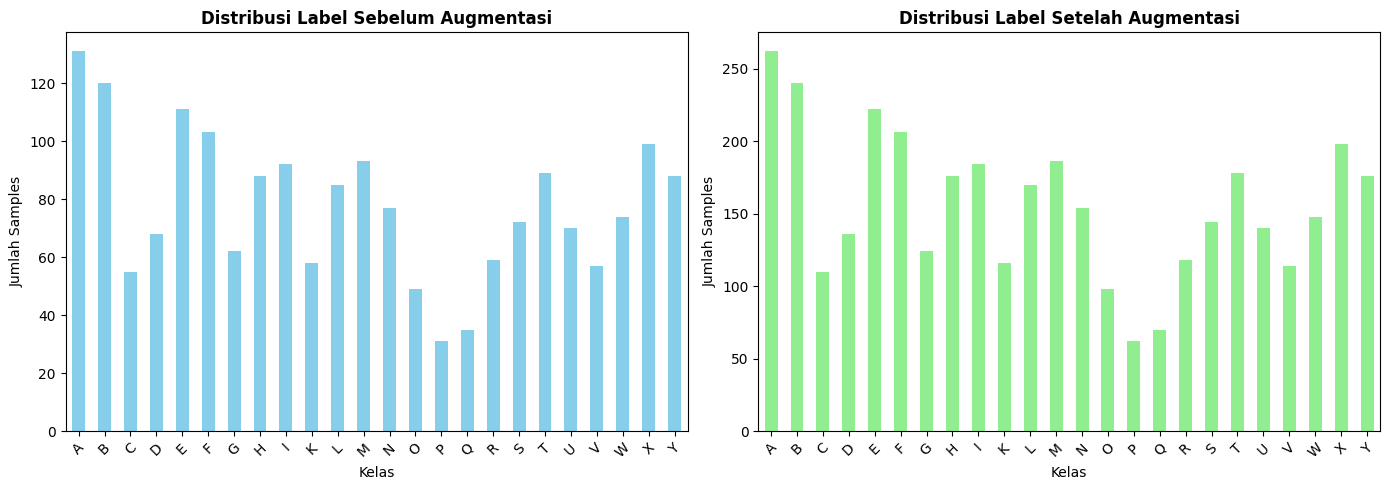


STEP 3: BALANCING DATA DENGAN SMOTE
Shape setelah SMOTE: (6288, 63)
Jumlah samples sebelum SMOTE: 3732
Jumlah samples sesudah SMOTE: 6288


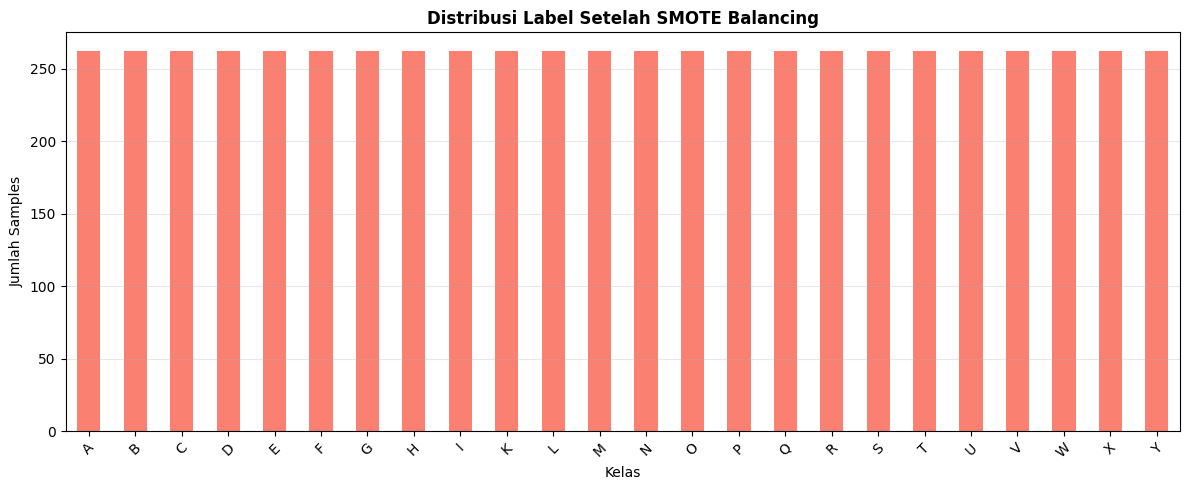


Statistik jumlah samples per kelas:
A    262
B    262
C    262
D    262
E    262
F    262
G    262
H    262
I    262
K    262
L    262
M    262
N    262
O    262
P    262
Q    262
R    262
S    262
T    262
U    262
V    262
W    262
X    262
Y    262
Name: count, dtype: int64

PROSES SELESAI!
Data siap untuk training
Total samples: 6288
Total features: 63
Total kelas: 24


In [5]:
# ===============================================
# Normalisasi, Augmentasi, dan Balancing Data
# ===============================================

# Load data dari CSV yang sudah dibuat di cell sebelumnya
df = pd.read_csv("landmark_features.csv")

# Pisahkan features dan labels
X = df.drop(['label', 'hand_type'], axis=1).values
y = df['label'].values

print("="*60)
print("STEP 1: NORMALISASI DATA")
print("="*60)

# Normalisasi menggunakan MinMaxScaler (0-1)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

print(f"Shape data setelah normalisasi: {X_normalized.shape}")
print(f"Range nilai: [{X_normalized.min():.4f}, {X_normalized.max():.4f}]")
print(f"Mean: {X_normalized.mean():.4f}, Std: {X_normalized.std():.4f}")

print("\n" + "="*60)
print("STEP 2: AUGMENTASI DATA")
print("="*60)

# Augmentasi dengan menambahkan noise kecil
X_augmented = []
y_augmented = []

for i in range(len(X_normalized)):
    # Data original
    X_augmented.append(X_normalized[i])
    y_augmented.append(y[i])
    
    # Data dengan noise (augmentasi)
    noise = np.random.normal(0, 0.02, X_normalized[i].shape)
    X_augmented.append(X_normalized[i] + noise)
    y_augmented.append(y[i])

X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

print(f"Shape setelah augmentasi: {X_augmented.shape}")
print(f"Jumlah samples sebelum: {len(X_normalized)}")
print(f"Jumlah samples sesudah: {len(X_augmented)}")

# Visualisasi distribusi label sebelum dan sesudah augmentasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

pd.Series(y).value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Label Sebelum Augmentasi', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah Samples')
axes[0].tick_params(axis='x', rotation=45)

pd.Series(y_augmented).value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Distribusi Label Setelah Augmentasi', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah Samples')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("STEP 3: BALANCING DATA DENGAN SMOTE")
print("="*60)

# Apply SMOTE untuk balancing data
smote = SMOTE(random_state=42, k_neighbors=5)
X_balanced, y_balanced = smote.fit_resample(X_augmented, y_augmented)

print(f"Shape setelah SMOTE: {X_balanced.shape}")
print(f"Jumlah samples sebelum SMOTE: {len(X_augmented)}")
print(f"Jumlah samples sesudah SMOTE: {len(X_balanced)}")

# Visualisasi distribusi label setelah SMOTE
plt.figure(figsize=(12, 5))
pd.Series(y_balanced).value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Distribusi Label Setelah SMOTE Balancing', fontsize=12, fontweight='bold')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Samples')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Statistik detail per kelas
print("\nStatistik jumlah samples per kelas:")
print(pd.Series(y_balanced).value_counts().sort_index())

print("\n" + "="*60)
print("PROSES SELESAI!")
print("="*60)
print(f"Data siap untuk training")
print(f"Total samples: {len(X_balanced)}")
print(f"Total features: {X_balanced.shape[1]}")
print(f"Total kelas: {len(np.unique(y_balanced))}")

STEP 1: NORMALISASI DATA (PALM-CENTERED)
Shape data sebelum normalisasi: (1866, 63)
Min: -0.6021, Max: 1.0993
Mean: 0.3232, Std: 0.3269


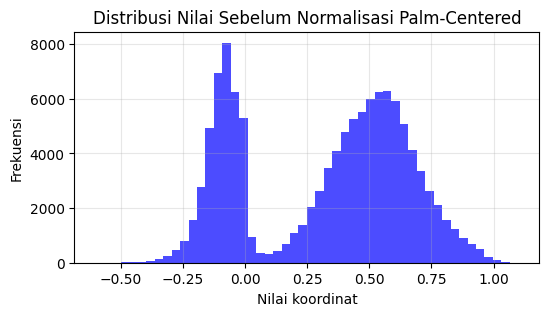

Shape data setelah normalisasi: (1866, 63)
Min: -0.9141, Max: 0.7781
Mean: -0.1440, Std: 0.1957


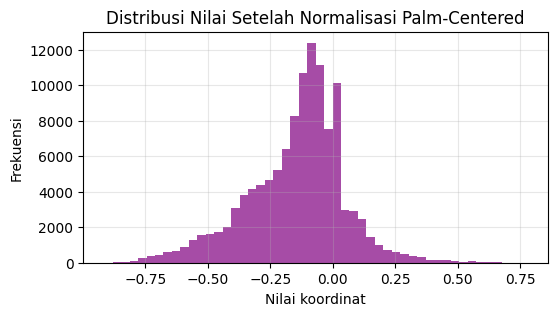


STEP 2: AUGMENTASI DATA
Shape setelah augmentasi: (3732, 63)
Jumlah sebelum: 1866, sesudah: 3732


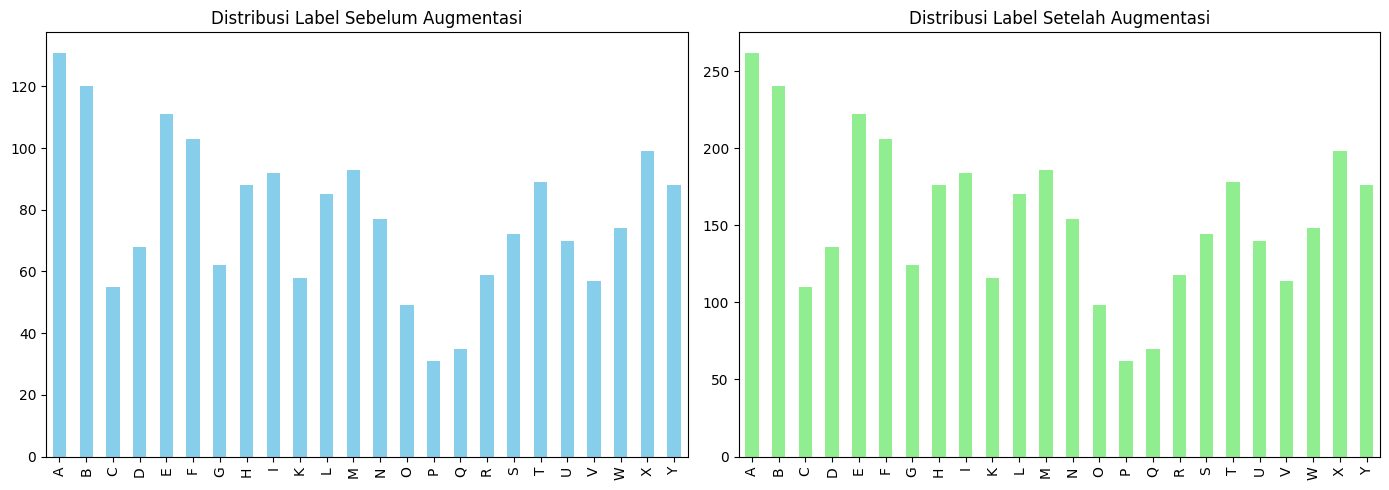


Jumlah samples per kelas sebelum augmentasi:
A    131
B    120
C     55
D     68
E    111
F    103
G     62
H     88
I     92
K     58
L     85
M     93
N     77
O     49
P     31
Q     35
R     59
S     72
T     89
U     70
V     57
W     74
X     99
Y     88
Name: count, dtype: int64

Jumlah samples per kelas setelah augmentasi:
A    262
B    240
C    110
D    136
E    222
F    206
G    124
H    176
I    184
K    116
L    170
M    186
N    154
O     98
P     62
Q     70
R    118
S    144
T    178
U    140
V    114
W    148
X    198
Y    176
Name: count, dtype: int64

STEP 3: BALANCING DATA DENGAN SMOTE
Shape setelah SMOTE: (6288, 63)


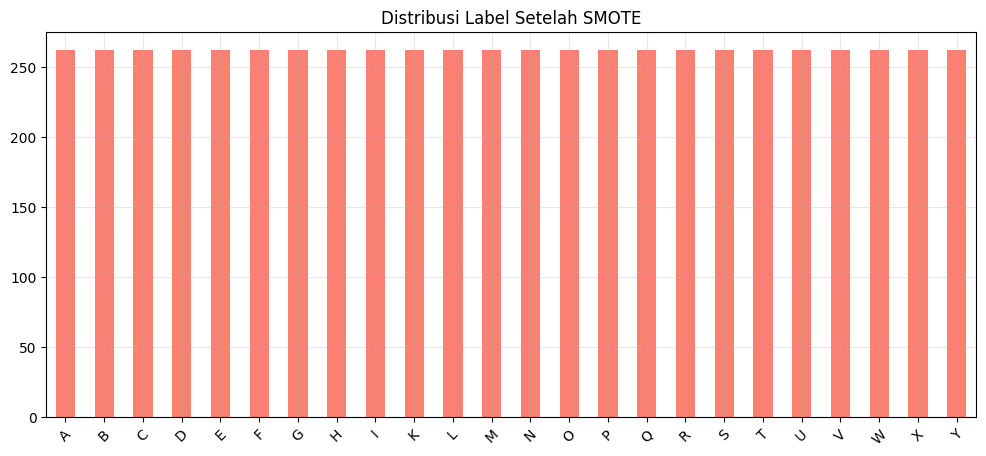


Statistik per kelas:
A    262
B    262
C    262
D    262
E    262
F    262
G    262
H    262
I    262
K    262
L    262
M    262
N    262
O    262
P    262
Q    262
R    262
S    262
T    262
U    262
V    262
W    262
X    262
Y    262
Name: count, dtype: int64

PROSES SELESAI!
Total samples: 6288
Total features: 63
Total kelas: 24


In [6]:
# ===============================================
# Normalisasi, Augmentasi, dan Balancing Data
# ===============================================

# Load data dari CSV yang sudah dibuat di cell sebelumnya
df = pd.read_csv("landmark_features.csv")

# Pisahkan features dan labels
X = df.drop(['label', 'hand_type'], axis=1).values
y = df['label'].values

print("="*60)
print("STEP 1: NORMALISASI DATA (PALM-CENTERED)")
print("="*60)

# -------------------------------------------------------------
# NORMALISASI BARU:
#   - Landmark 0 (wrist / palm base) dijadikan pusat (0,0,0)
#   - Landmark lain dipindahkan relatif terhadap landmark 0
# -------------------------------------------------------------

X_normalized = []

for row in X:
    # reshape: 63 -> (21 landmarks, 3 koordinat)
    coords = row.reshape(-1, 3)

    # landmark 0 sebagai pusat
    palm = coords[0]

    # shift semua landmark relatif ke pusat
    coords_norm = coords - palm

    # flatten kembali ke 1D
    X_normalized.append(coords_norm.flatten())

X_normalized = np.array(X_normalized)

#shape dan statistik data sebelum normalisasi palm-centered
print(f"Shape data sebelum normalisasi: {X.shape}")
print(f"Min: {X.min():.4f}, Max: {X.max():.4f}")
print(f"Mean: {X.mean():.4f}, Std: {X.std():.4f}")


# ====== VISUALISASI NORMALISASI (seperti versi Anda sebelumnya) ======
#visualisasi distribusi nilai sebelum normalisasi palm-centered
plt.figure(figsize=(6,3))
plt.hist(X.flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Distribusi Nilai Sebelum Normalisasi Palm-Centered")
plt.xlabel("Nilai koordinat")
plt.ylabel("Frekuensi")
plt.grid(alpha=0.3)
plt.show()

# shape dan statistik data setelah normalisasi palm-centered
print(f"Shape data setelah normalisasi: {X_normalized.shape}")
print(f"Min: {X_normalized.min():.4f}, Max: {X_normalized.max():.4f}")
print(f"Mean: {X_normalized.mean():.4f}, Std: {X_normalized.std():.4f}")

#visualisasi distribusi nilai setelah normalisasi palm-centered
plt.figure(figsize=(6,3))
plt.hist(X_normalized.flatten(), bins=50, color='purple', alpha=0.7)
plt.title("Distribusi Nilai Setelah Normalisasi Palm-Centered")
plt.xlabel("Nilai koordinat")
plt.ylabel("Frekuensi")
plt.grid(alpha=0.3)
plt.show()

# ============================================================
# STEP 2: AUGMENTASI DATA (kode asli Anda)
# ============================================================

print("\n" + "="*60)
print("STEP 2: AUGMENTASI DATA")
print("="*60)

X_augmented = []
y_augmented = []

for i in range(len(X_normalized)):
    X_augmented.append(X_normalized[i])
    y_augmented.append(y[i])

    noise = np.random.normal(0, 0.02, X_normalized[i].shape)
    X_augmented.append(X_normalized[i] + noise)
    y_augmented.append(y[i])

X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

print(f"Shape setelah augmentasi: {X_augmented.shape}")
print(f"Jumlah sebelum: {len(X_normalized)}, sesudah: {len(X_augmented)}")

# Visualisasi distribusi label sebelum & sesudah augmentasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

pd.Series(y).value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Label Sebelum Augmentasi')

pd.Series(y_augmented).value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Distribusi Label Setelah Augmentasi')

plt.tight_layout()
plt.show()

# Jumlah samples per kelas sebelum & sesudah augmentasi
print("\nJumlah samples per kelas sebelum augmentasi:")
print(pd.Series(y).value_counts().sort_index())
print("\nJumlah samples per kelas setelah augmentasi:")
print(pd.Series(y_augmented).value_counts().sort_index())

# ============================================================
# STEP 3: SMOTE (kode asli Anda)
# ============================================================

print("\n" + "="*60)
print("STEP 3: BALANCING DATA DENGAN SMOTE")
print("="*60)

smote = SMOTE(random_state=42, k_neighbors=5)
X_balanced, y_balanced = smote.fit_resample(X_augmented, y_augmented)

print(f"Shape setelah SMOTE: {X_balanced.shape}")

plt.figure(figsize=(12,5))
pd.Series(y_balanced).value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title("Distribusi Label Setelah SMOTE")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

print("\nStatistik per kelas:")
print(pd.Series(y_balanced).value_counts().sort_index())

print("\n" + "="*60)
print("PROSES SELESAI!")
print("="*60)
print(f"Total samples: {len(X_balanced)}")
print(f"Total features: {X_balanced.shape[1]}")
print(f"Total kelas: {len(np.unique(y_balanced))}")


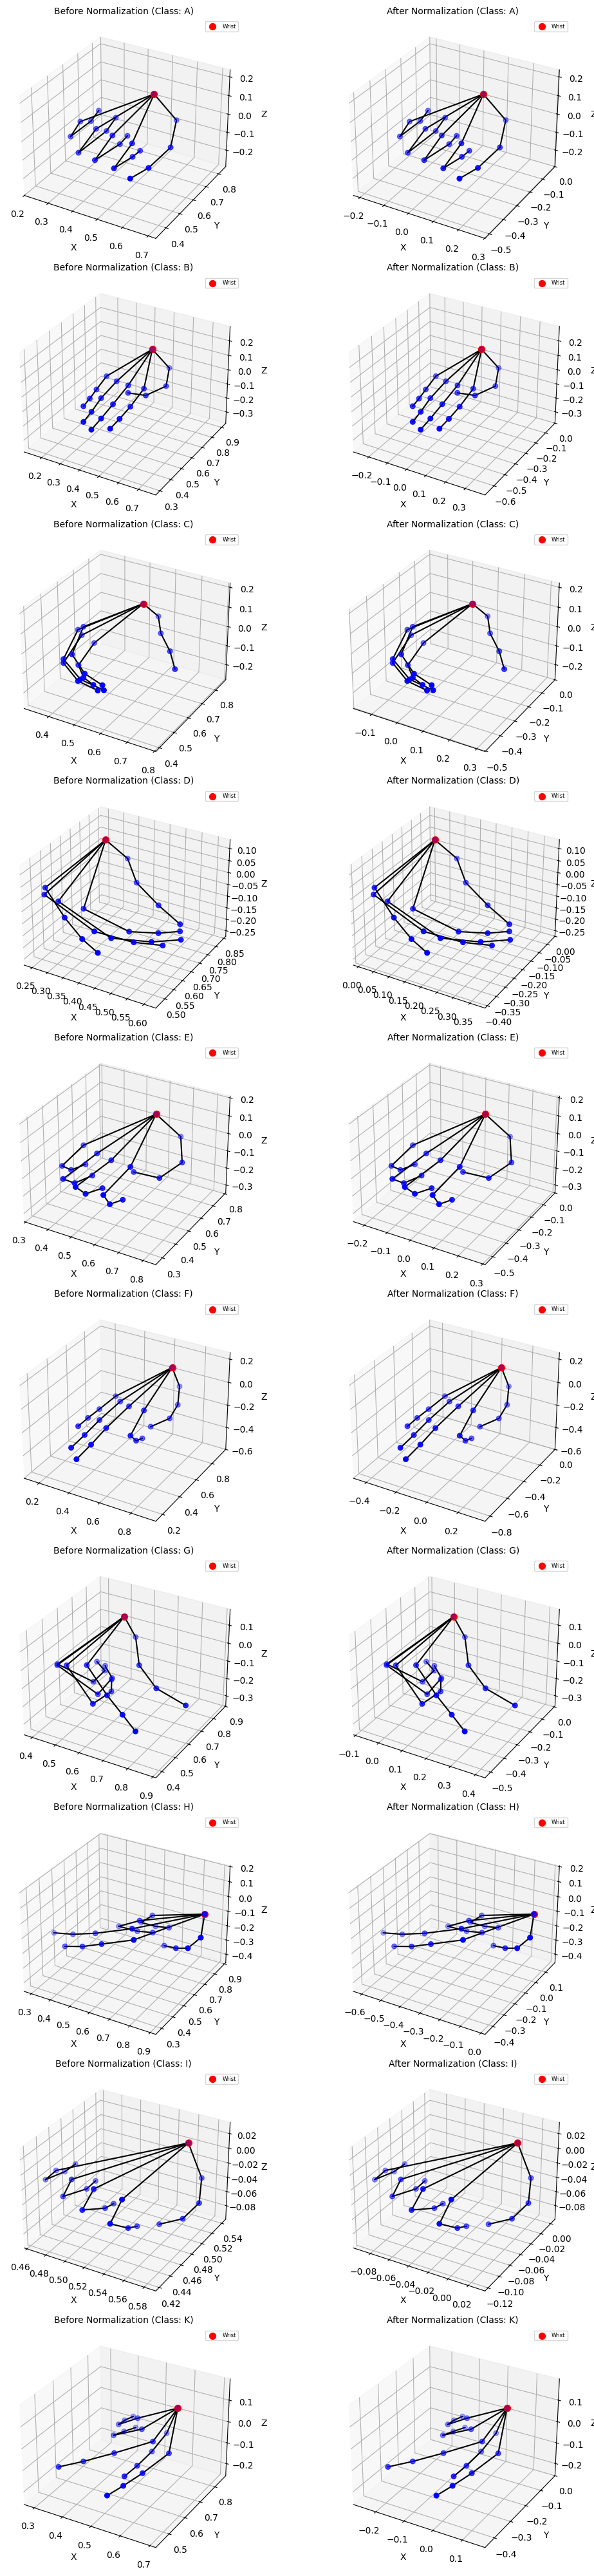

Visualisasi selesai!


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Struktur koneksi MediaPipe Hands (21 landmark)
mp_connections = [
    (0, 1), (1, 2), (2, 3), (3, 4),       # Thumb
    (0, 5), (5, 6), (6, 7), (7, 8),       # Index
    (0, 9), (9,10), (10,11), (11,12),     # Middle
    (0,13), (13,14), (14,15), (15,16),    # Ring
    (0,17), (17,18), (18,19), (19,20)     # Pinky
]

# ===========================================================
# 1. Ambil 10 sampel (masing-masing dari kelas berbeda)
# ===========================================================

# Ambil 10 kelas unik pertama
unique_labels = np.unique(y)[:10]

# Simpan 1 sample dari tiap kelas
samples = []
labels = []

for lbl in unique_labels:
    idx = np.where(y == lbl)[0][0]   # ambil index pertama kelas itu
    samples.append(X[idx])
    labels.append(lbl)

# ===========================================================
# 2. Fungsi plot skeleton 3D
# ===========================================================
def plot_hand_3d(ax, coords, title):
    xs, ys, zs = coords[:,0], coords[:,1], coords[:,2]

    ax.scatter(xs, ys, zs, s=30, c='blue')

    for a, b in mp_connections:
        ax.plot([xs[a], xs[b]], [ys[a], ys[b]], [zs[a], zs[b]], c='black')

    ax.scatter(xs[0], ys[0], zs[0], s=50, c='red', label="Wrist")
    ax.legend(loc='upper right', fontsize=6)

    ax.set_title(title, fontsize=10)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Membuat proporsi plot seimbang
    max_range = np.array([xs.max()-xs.min(), ys.max()-ys.min(), zs.max()-zs.min()]).max()
    mid_x = (xs.max() + xs.min()) / 2
    mid_y = (ys.max() + ys.min()) / 2
    mid_z = (zs.max() + zs.min()) / 2
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

# ===========================================================
# 3. Plot Before vs After Normalization for 10 Samples
# ===========================================================
fig = plt.figure(figsize=(12, 40))

for i, (sample, lbl) in enumerate(zip(samples, labels)):
    coords_before = sample.reshape(21, 3)
    palm = coords_before[0]
    coords_after = coords_before - palm

    # BEFORE
    ax1 = fig.add_subplot(10, 2, 2*i + 1, projection='3d')
    plot_hand_3d(ax1, coords_before, f"Before Normalization (Class: {lbl})")

    # AFTER
    ax2 = fig.add_subplot(10, 2, 2*i + 2, projection='3d')
    plot_hand_3d(ax2, coords_after, f"After Normalization (Class: {lbl})")

plt.tight_layout()
plt.show()

print("Visualisasi selesai!")


In [8]:
# One-hot encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_balanced)
num_classes = len(label_encoder.classes_)
y_onehot = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

# --- IGNORE ---
print(f"Shape X_balanced: {X_balanced.shape}")
print(f"Shape y_onehot: {y_onehot.shape}")

Shape X_balanced: (6288, 63)
Shape y_onehot: (6288, 24)


#  Label Encode dan Split Data

In [9]:
# ===============================================
# 5. Encode Label dan Split Data
# ===============================================

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_balanced)
print("Classes:", le.classes_)
print("Encoded labels:", np.unique(y_encoded))

# Split data
X_train, X_test, y_train, y_test = train_test_split(
	X_balanced, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Classes: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S'
 'T' 'U' 'V' 'W' 'X' 'Y']
Encoded labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Train shape: (5030, 63), Test shape: (1258, 63)


# Train MLP

=== Evaluasi MLP ===
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        52
           B       1.00      1.00      1.00        52
           C       1.00      1.00      1.00        52
           D       1.00      1.00      1.00        52
           E       0.98      1.00      0.99        53
           F       1.00      0.98      0.99        52
           G       1.00      1.00      1.00        53
           H       1.00      1.00      1.00        53
           I       1.00      0.98      0.99        52
           K       1.00      1.00      1.00        52
           L       1.00      1.00      1.00        53
           M       1.00      0.98      0.99        52
           N       0.98      1.00      0.99        52
           O       1.00      1.00      1.00        52
           P       1.00      1.00      1.00        53
           Q       1.00      1.00      1.00        52
           R       0.98      0.98      0.98        52
      

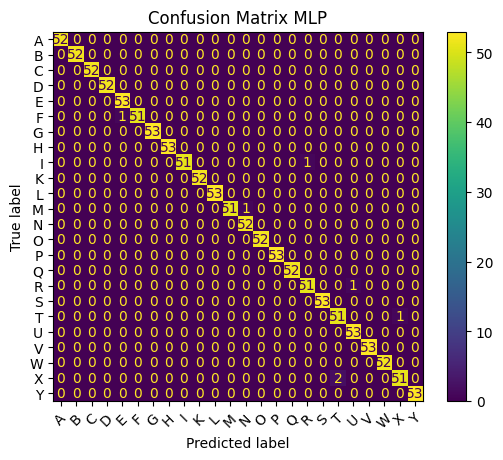

🔢 Total parameter dalam model MLP: 18,008


In [12]:
# ===============================================
# 6. Train MLP
# ===============================================
from sklearn.metrics import ConfusionMatrixDisplay

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("=== Evaluasi MLP ===")
print(classification_report(y_test, y_pred_mlp, target_names=le.classes_))

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
ConfusionMatrixDisplay(cm_mlp, display_labels=le.classes_).plot(xticks_rotation=45)
plt.title("Confusion Matrix MLP")
plt.show()

# ✅ Fix: Gunakan nama variabel yang benar
total_params_mlp = sum(coefs.size + intercepts.size for coefs, intercepts in zip(mlp.coefs_, mlp.intercepts_))
print(f"🔢 Total parameter dalam model MLP: {total_params_mlp:,}")


Train accuracy: 0.9990, F1: 0.9990
Test  accuracy: 0.9944, F1: 0.9944
Gap (train - test): 0.0046
Kesimpulan: Good fit (generalizes well)

Classification report (Test):
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        52
           B       1.00      1.00      1.00        52
           C       1.00      1.00      1.00        52
           D       1.00      1.00      1.00        52
           E       0.98      1.00      0.99        53
           F       1.00      0.98      0.99        52
           G       1.00      1.00      1.00        53
           H       1.00      1.00      1.00        53
           I       1.00      0.98      0.99        52
           K       1.00      1.00      1.00        52
           L       1.00      1.00      1.00        53
           M       1.00      0.98      0.99        52
           N       0.98      1.00      0.99        52
           O       1.00      1.00      1.00        52
           P       1.

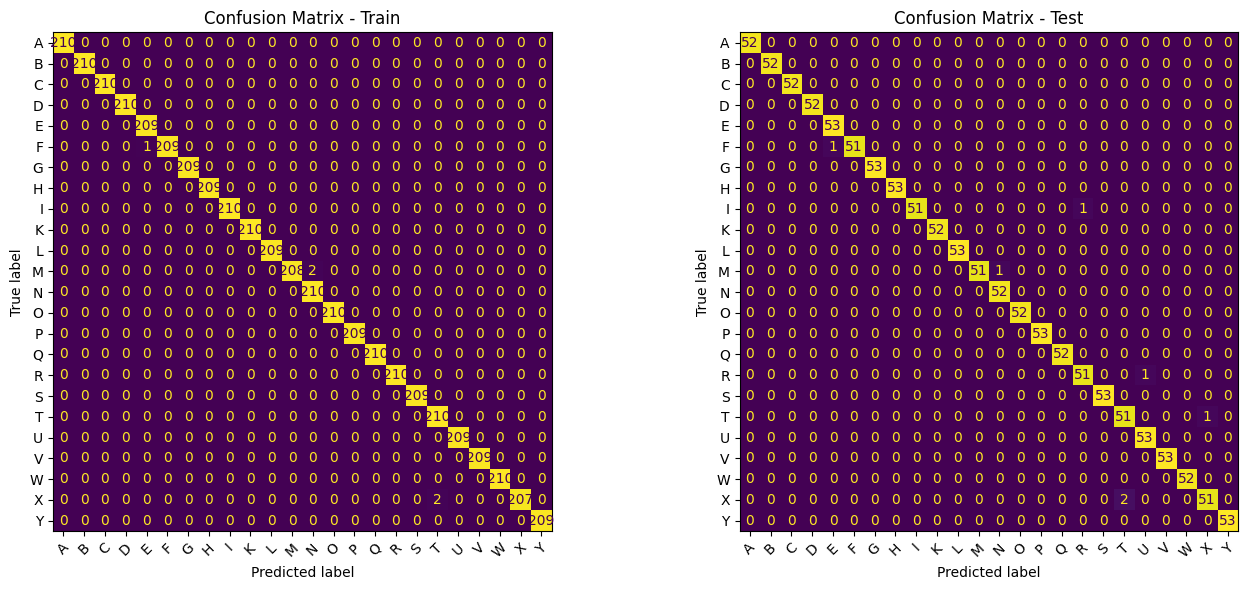

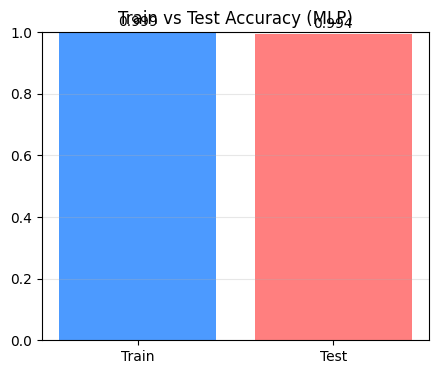

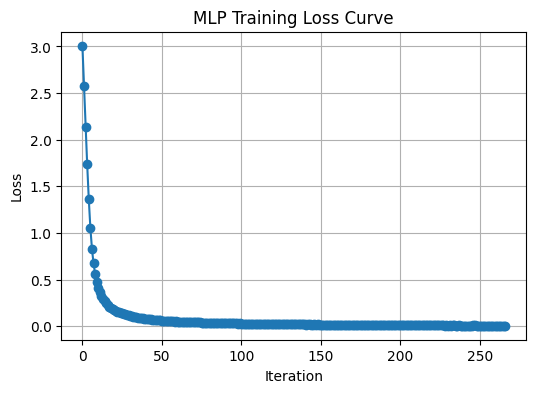

In [13]:
from sklearn.metrics import accuracy_score

# Cek overfitting / underfitting untuk MLP
# Mengandalkan variabel yang sudah ada: mlp, X_train, y_train, X_test, y_test, le

# Pastikan prediksi tersedia
if 'y_train_pred' not in globals():
    y_train_pred = mlp.predict(X_train)
if 'y_pred_mlp' not in globals():
    y_pred_mlp = mlp.predict(X_test)

# Metikak metric
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred_mlp)
train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_pred_mlp, average='macro')

print(f"Train accuracy: {train_acc:.4f}, F1: {train_f1:.4f}")
print(f"Test  accuracy: {test_acc:.4f}, F1: {test_f1:.4f}")
print(f"Gap (train - test): {train_acc - test_acc:.4f}")

# Heuristik keputusan singkat
gap = train_acc - test_acc
if gap > 0.10 and train_acc > 0.95:
    verdict = "Overfitting (train sangat tinggi, test jauh lebih rendah)"
elif gap > 0.05:
    verdict = "Kemungkinan overfitting (ada gap signifikan)"
elif train_acc < 0.65 and test_acc < 0.65:
    verdict = "Underfitting (kedua akurasi rendah)"
elif train_acc < 0.85 and test_acc < 0.85:
    verdict = "Kemungkinan underfitting / model kurang kapasitas"
elif abs(gap) <= 0.05 and train_acc > 0.90:
    verdict = "Good fit (generalizes well)"
else:
    verdict = "Fit ambigous — periksa learning curve, confusion matrix, dan distribusi kelas"

print("Kesimpulan:", verdict)

# Tampilkan classification report & confusion matrix untuk test (lebih detail)
print("\nClassification report (Test):")
print(classification_report(y_test, y_pred_mlp, target_names=le.classes_))

fig, axes = plt.subplots(1, 2, figsize=(14,6))
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred_mlp)

ConfusionMatrixDisplay(cm_train, display_labels=le.classes_).plot(ax=axes[0], xticks_rotation=45, colorbar=False)
axes[0].set_title("Confusion Matrix - Train")
ConfusionMatrixDisplay(cm_test, display_labels=le.classes_).plot(ax=axes[1], xticks_rotation=45, colorbar=False)
axes[1].set_title("Confusion Matrix - Test")
plt.tight_layout()
plt.show()

# Plot bar sederhana train vs test accuracies dan loss curve jika tersedia
plt.figure(figsize=(5,4))
plt.bar(['Train','Test'], [train_acc, test_acc], color=['#4C9AFF','#FF7F7F'])
plt.ylim(0,1)
for i,v in enumerate([train_acc, test_acc]):
    plt.text(i, v+0.02, f"{v:.3f}", ha='center')
plt.title("Train vs Test Accuracy (MLP)")
plt.grid(axis='y', alpha=0.3)
plt.show()

if hasattr(mlp, "loss_curve_"):
    plt.figure(figsize=(6,4))
    plt.plot(mlp.loss_curve_, marker='o')
    plt.title("MLP Training Loss Curve")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0

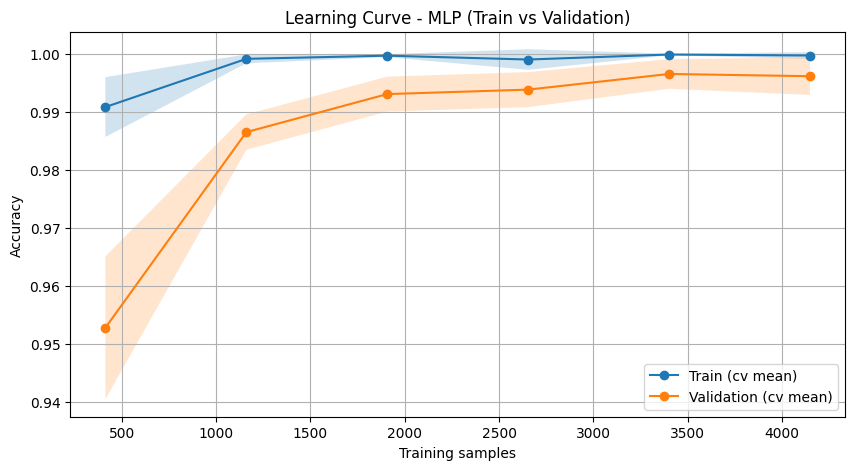

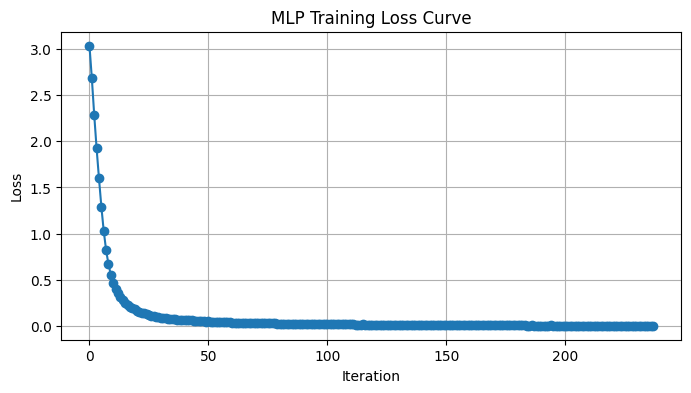

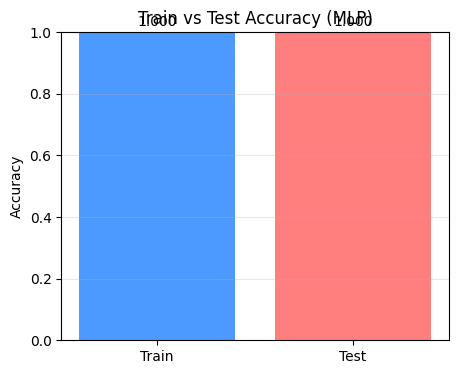

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

import matplotlib.pyplot as plt

# Use full balanced dataset (fall back to train set if unavailable)
X_full = globals().get('X_balanced', None)
y_full = globals().get('y_encoded', None)
if X_full is None or y_full is None:
    X_full = globals().get('X_train')
    y_full = globals().get('y_train')

# Compute learning curve (train vs validation)
train_sizes = np.linspace(0.1, 1.0, 6)
train_sizes_abs, train_scores, val_scores = learning_curve(
    mlp, X_full, y_full, cv=5, train_sizes=train_sizes,
    scoring='accuracy', n_jobs=-1, shuffle=True, random_state=42
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes_abs, train_mean, marker='o', label='Train (cv mean)')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes_abs, val_mean, marker='o', label='Validation (cv mean)')
plt.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.title('Learning Curve - MLP (Train vs Validation)')
plt.xlabel('Training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss curve (per-iteration) if available
if hasattr(mlp, "loss_curve_"):
    plt.figure(figsize=(8, 4))
    plt.plot(mlp.loss_curve_, marker='o')
    plt.title('MLP Training Loss Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Plot final Train vs Test accuracy (if variables exist)
train_acc = globals().get('train_acc', None)
test_acc = globals().get('test_acc', None)
if train_acc is not None and test_acc is not None:
    plt.figure(figsize=(5, 4))
    plt.bar(['Train', 'Test'], [train_acc, test_acc], color=['#4C9AFF', '#FF7F7F'])
    plt.ylim(0, 1)
    for i, v in enumerate([train_acc, test_acc]):
        plt.text(i, v + 0.02, f"{v:.3f}", ha='center')
    plt.title('Train vs Test Accuracy (MLP)')
    plt.ylabel('Accuracy')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

In [ ]:
#persentase akurasi MLP
accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"Akurasi MLP: {accuracy*100:.2f}%")

Akurasi MLP: 100.00%


Info: menggunakan variabel 'mlp' sebagai 'mlp_model'.
Akurasi Training: 1.0000
Akurasi Testing: 1.0000
Selisih Akurasi (Training - Testing): 0.0000

=== Analisis Overfitting/Underfitting ===
Model memiliki performa yang SEIMBANG
(Tidak ada indikasi overfitting atau underfitting yang signifikan)

=== Learning Curve Analysis ===


/media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/myvenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/myvenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/myvenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/myvenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochas

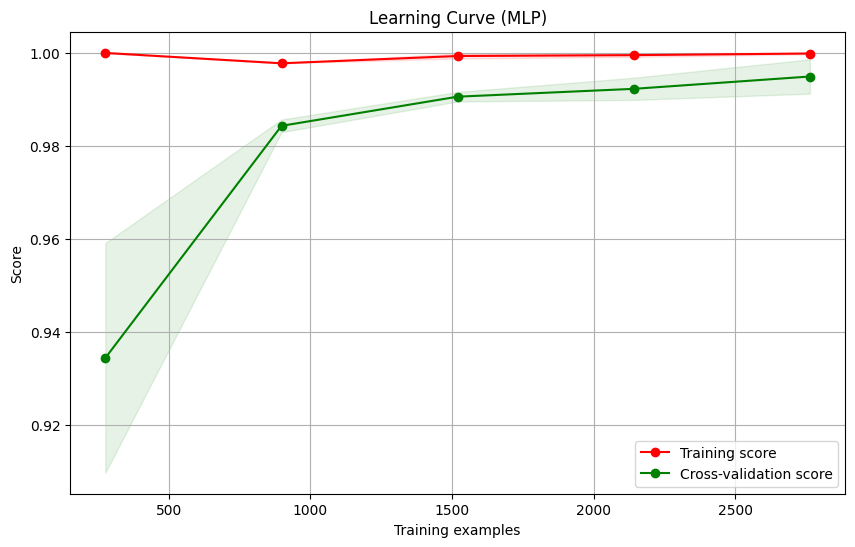

Interpretasi Learning Curve:
- Jika kurva training dan validation konvergen ke nilai tinggi: Model baik
- Jika gap besar antara training dan validation: Overfitting
- Jika kedua kurva rendah: Underfitting


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# ===============================================
# Evaluasi Overfitting/Underfitting untuk Model MLP
# ===============================================

# Asumsi: model MLP sudah di-train dan tersimpan dalam variabel 'mlp_model'
# Jika Anda menggunakan variabel bernama 'mlp' (mis. MLPClassifier), kita buat alias.
# Data split: X_train, X_test, y_train, y_test

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Pastikan mlp_model ada. Jika tidak, coba gunakan variabel 'mlp' yang mungkin sudah ada.
try:
    mlp_model
except NameError:
    try:
        mlp_model = mlp
        print("Info: menggunakan variabel 'mlp' sebagai 'mlp_model'.")
    except NameError:
        raise NameError("mlp_model tidak ditemukan. Definisikan/-load model terlatih pada variabel 'mlp_model' atau 'mlp' sebelum menjalankan cell ini.")

# 1. Hitung akurasi pada training dan testing set
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

# Jika model MLP dari sklearn, predict mengembalikan probabilitas
# Gunakan np.argmax untuk mendapatkan kelas (jika multi-class)
import numpy as np
if len(y_train_pred.shape) > 1 and y_train_pred.shape[1] > 1:
    y_train_pred = np.argmax(y_train_pred, axis=1)
    y_test_pred = np.argmax(y_test_pred, axis=1)
    # Jika label masih one-hot encoded
    if len(y_train.shape) > 1 and y_train.shape[1] > 1:
        y_train_labels = np.argmax(y_train, axis=1)
        y_test_labels = np.argmax(y_test, axis=1)
    else:
        y_train_labels = y_train
        y_test_labels = y_test
else:
    y_train_labels = y_train
    y_test_labels = y_test

train_accuracy = accuracy_score(y_train_labels, y_train_pred)
test_accuracy = accuracy_score(y_test_labels, y_test_pred)

print(f"Akurasi Training: {train_accuracy:.4f}")
print(f"Akurasi Testing: {test_accuracy:.4f}")
print(f"Selisih Akurasi (Training - Testing): {train_accuracy - test_accuracy:.4f}")

# 2. Analisis Overfitting/Underfitting
print("\n=== Analisis Overfitting/Underfitting ===")
if train_accuracy > 0.95 and test_accuracy < train_accuracy - 0.1:
    print("Model kemungkinan mengalami OVERFITTING")
    print("(Akurasi training sangat tinggi, akurasi testing jauh lebih rendah)")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("Model kemungkinan mengalami UNDERFITTING")
    print("(Akurasi training dan testing sama-sama rendah)")
elif abs(train_accuracy - test_accuracy) < 0.05:
    print("Model memiliki performa yang SEIMBANG")
    print("(Tidak ada indikasi overfitting atau underfitting yang signifikan)")
else:
    print("Model mungkin mengalami sedikit overfitting")
    print(f"(Perbedaan akurasi: {train_accuracy - test_accuracy:.4f})")

# 3. Jika menggunakan MLP dari sklearn dan menyimpan history training
# (Catatan: MLPClassifier dari sklearn tidak menyimpan history secara default)
# Untuk mendapatkan history, Anda perlu menggunakan callback atau tensorflow/keras

# Alternatif: Jika menggunakan tensorflow/keras untuk MLP
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History

# Contoh jika model MLP dibuat dengan Keras
history = History()
mlp_model_keras = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
mlp_model_keras.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = mlp_model_keras.fit(X_train, y_train, 
                              validation_data=(X_test, y_test),
                              epochs=50, 
                              batch_size=32,
                              verbose=0)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

# Analisis dari plot
print("\n=== Analisis dari Training History ===")
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

if final_val_loss > final_train_loss and (final_val_loss - final_train_loss) > 0.1:
    print("Indikasi OVERFITTING: Validation loss jauh lebih tinggi dari training loss")
elif final_train_loss > 0.5 and final_val_loss > 0.5:
    print("Indikasi UNDERFITTING: Training loss dan validation loss masih tinggi")
else:
    print("Model konvergen dengan baik")
"""

# 4. Jika menggunakan MLPClassifier dari sklearn, kita bisa buat simple learning curve
# dengan variasi jumlah data training
from sklearn.model_selection import learning_curve
import numpy as np

# Fungsi untuk plotting learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()
    
    return plt

# Plot learning curve untuk MLP
print("\n=== Learning Curve Analysis ===")
try:
    # Gunakan subset data jika dataset terlalu besar untuk performa
    if len(X_train) > 5000:
        X_subset = X_train[:5000]
        y_subset = y_train_labels[:5000]
    else:
        X_subset = X_train
        y_subset = y_train_labels
    
    plot_learning_curve(mlp_model, "Learning Curve (MLP)", 
                       X_subset, y_subset, cv=3)
    
    print("Interpretasi Learning Curve:")
    print("- Jika kurva training dan validation konvergen ke nilai tinggi: Model baik")
    print("- Jika gap besar antara training dan validation: Overfitting")
    print("- Jika kedua kurva rendah: Underfitting")
    
except Exception as e:
    print(f"Tidak bisa membuat learning curve: {e}")
    print("Mungkin karena dataset terlalu besar atau format label tidak sesuai")

# 5. Confusion Matrix untuk analisis lebih detail
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

print("\n=== Confusion Matrix Analysis ===")
cm = confusion_matrix(y_test_labels, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Hitung precision, recall, f1 untuk tiap kelas
from sklearn.metrics import classification_report
print("\n=== Classification Report ===")
print(classification_report(y_test_labels, y_test_pred))

# 6. Rekomendasi berdasarkan hasil analisis
print("\n=== Rekomendasi ===")
if train_accuracy > test_accuracy + 0.15:
    print("1. Kurangi kompleksitas model (kurangi hidden layers/neurons)")
    print("2. Tambahkan regularization (L1/L2)")
    print("3. Gunakan dropout (jika menggunakan neural network framework)")
    print("4. Augmentasi data atau kumpulkan lebih banyak data")
    print("5. Gunakan early stopping")
elif train_accuracy < 0.7:
    print("1. Tingkatkan kompleksitas model (tambah hidden layers/neurons)")
    print("2. Train lebih banyak epoch")
    print("3. Gunakan feature engineering yang lebih baik")
    print("4. Coba algoritma/model yang berbeda")
    print("5. Periksa apakah data sudah dinormalisasi dengan benar")
else:
    print("Model sudah cukup baik. Pertimbangkan:")
    print("1. Fine-tuning hyperparameters")
    print("2. Ensemble methods")
    print("3. Cross-validation untuk evaluasi lebih robust")

In [ ]:
# ===============================================
# PREPROCESSING YANG BENAR
# ===============================================

# 1. Load data original (tanpa augmentasi/smote dulu)
df = pd.read_csv("landmark_features.csv")
X = df.drop(['label', 'hand_type'], axis=1).values
y = df['label'].values

# 2. Normalisasi YANG BENAR
def normalize_landmarks(coords):
    """Normalisasi dengan translation DAN scaling"""
    # Reshape ke (21, 3)
    if coords.ndim == 1:
        coords = coords.reshape(-1, 3)
    
    # 1. Translate: wrist sebagai origin
    palm = coords[0]
    coords_translated = coords - palm
    
    # 2. Scale: normalisasi ke range [-1, 1] atau [0, 1]
    # Gunakan bounding box tangan
    min_vals = coords_translated.min(axis=0)
    max_vals = coords_translated.max(axis=0)
    
    # Hindari division by zero
    range_vals = max_vals - min_vals
    range_vals[range_vals == 0] = 1  # avoid zero division
    
    # Normalize
    coords_normalized = (coords_translated - min_vals) / range_vals
    
    return coords_normalized.flatten()

# Apply normalization
X_normalized = np.array([normalize_landmarks(x) for x in X])

print(f"Shape setelah normalisasi: {X_normalized.shape}")
print(f"Range: [{X_normalized.min():.4f}, {X_normalized.max():.4f}]")

# 3. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. SPLIT DATA DULU sebelum augmentasi dan SMOTE!
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_normalized, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nSplit data:")
print(f"Training: {X_train_raw.shape}, Testing: {X_test_raw.shape}")

# 5. AUGMENTASI hanya pada training data
def augment_data(X_train, y_train, noise_level=0.03, num_augmented=1):
    """Augmentasi hanya pada data training"""
    X_augmented = []
    y_augmented = []
    
    for i in range(len(X_train)):
        # Original data
        X_augmented.append(X_train[i])
        y_augmented.append(y_train[i])
        
        # Augmented versions
        for _ in range(num_augmented):
            noise = np.random.normal(0, noise_level, X_train[i].shape)
            X_augmented.append(X_train[i] + noise)
            y_augmented.append(y_train[i])
    
    return np.array(X_augmented), np.array(y_augmented)

X_train_aug, y_train_aug = augment_data(X_train_raw, y_train_raw, num_augmented=2)
print(f"\nSetelah augmentasi training:")
print(f"Training: {X_train_aug.shape}")

# 6. SMOTE hanya pada training data yang sudah di-augment
smote = SMOTE(random_state=42, k_neighbors=min(5, len(np.unique(y_train_aug))-1))
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_aug, y_train_aug)

print(f"\nSetelah SMOTE pada training:")
print(f"Training balanced: {X_train_balanced.shape}")
print(f"Class distribution training: {np.bincount(y_train_balanced)}")

# Testing data TIDAK diaugmentasi atau di-SMOTE!
X_test = X_test_raw
y_test = y_test_raw
print(f"Testing (original): {X_test.shape}")
print(f"Class distribution testing: {np.bincount(y_test)}")

Shape setelah normalisasi: (954, 63)
Range: [0.0000, 1.0000]

Split data:
Training: (763, 63), Testing: (191, 63)

Setelah augmentasi training:
Training: (2289, 63)

Setelah SMOTE pada training:
Training balanced: (6192, 63)
Class distribution training: [258 258 258 258 258 258 258 258 258 258 258 258 258 258 258 258 258 258
 258 258 258 258 258 258]
Testing (original): (191, 63)
Class distribution testing: [18 22  3  4 14 16  3  8 12  4  6  8  7  7  2  0  6  7  7  6  6  8  8  9]


In [ ]:
# ===============================================
# VALIDASI DENGAN CROSS-VALIDATION
# ===============================================

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Gunakan data original (tanpa augmentasi) untuk validasi
mlp_simple = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)

# Cross-validation 5-fold
cv_scores = cross_val_score(mlp_simple, X_normalized, y_encoded, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='accuracy')

print("\n=== CROSS-VALIDATION RESULTS ===")
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

if cv_scores.mean() < 0.95:
    print("⚠️ Hasil cross-validation lebih realistis!")
else:
    print("🚨 Masih 95%+ di CV - mungkin data terlalu sederhana atau ada masalah lain")

/media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/myvenv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/myvenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/myvenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/myvenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300


=== CROSS-VALIDATION RESULTS ===
CV Scores: [0.97905759 0.97905759 0.98429319 0.94764398 0.96842105]
Mean CV Accuracy: 0.9717 (+/- 0.0262)
🚨 Masih 95%+ di CV - mungkin data terlalu sederhana atau ada masalah lain


/media/ekhsan/New Volume/ME/CODE/Landmark_mediapipe/myvenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Cek distribusi nyata
print("=== DISTRIBUSI DATA ASLI ===")

# Pilih sumber label yang tersedia (prioritas: balanced -> augmented -> original)
label_sources = ['y_balanced', 'y_augmented', 'y', 'y_train', 'y_train_raw', 'y_full']
source_name = None
source = None
for name in label_sources:
    if name in globals():
        source = globals()[name]
        source_name = name
        break

if source is None:
    raise NameError("Tidak ditemukan array label (cari y, y_balanced, atau y_augmented).")

# Jika label berupa integer (encoded) dan LabelEncoder tersedia, kembalikan ke nama kelas
if np.issubdtype(source.dtype, np.integer) and 'le' in globals():
    labels = le.inverse_transform(source)
else:
    labels = source

unique, counts = np.unique(labels, return_counts=True)

print(f"Source labels used: {source_name}")
for cls, cnt in zip(unique, counts):
    print(f"{cls}: {cnt} samples → ", end="")
    if cnt < 10:
        print("❌ HAPUS (terlalu sedikit)")
    elif cnt < 30:
        print("⚠️  Minimal (pertimbangkan hapus)")
    elif cnt < 50:
        print("✓  Cukup")
    else:
        print("✓✓ Baik")

=== DISTRIBUSI DATA ASLI ===
Source labels used: y_balanced
A: 216 samples → ✓✓ Baik
B: 216 samples → ✓✓ Baik
C: 216 samples → ✓✓ Baik
D: 216 samples → ✓✓ Baik
E: 216 samples → ✓✓ Baik
F: 216 samples → ✓✓ Baik
G: 216 samples → ✓✓ Baik
H: 216 samples → ✓✓ Baik
I: 216 samples → ✓✓ Baik
K: 216 samples → ✓✓ Baik
L: 216 samples → ✓✓ Baik
M: 216 samples → ✓✓ Baik
N: 216 samples → ✓✓ Baik
O: 216 samples → ✓✓ Baik
P: 216 samples → ✓✓ Baik
Q: 216 samples → ✓✓ Baik
R: 216 samples → ✓✓ Baik
S: 216 samples → ✓✓ Baik
T: 216 samples → ✓✓ Baik
U: 216 samples → ✓✓ Baik
V: 216 samples → ✓✓ Baik
W: 216 samples → ✓✓ Baik
X: 216 samples → ✓✓ Baik
Y: 216 samples → ✓✓ Baik


# Train CNN